In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
iris= sns.load_dataset('iris')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


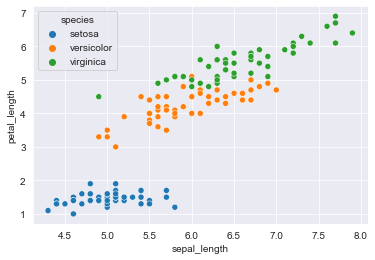

In [4]:
sns.scatterplot(data= iris, x= "sepal_length", y= "petal_length", hue= "species");

In [5]:
numeric_cols= ["sepal_length", "sepal_width", "petal_length", "petal_width"]

In [6]:
x= iris[numeric_cols]

### K Means Clustering

The K-means algorithm attempts to classify objects into a pre-determined number of clusters by finding optimal central points (called centroids) for each cluster. Each object is classifed as belonging the cluster represented by the closest centroid.

<img src="https://miro.medium.com/max/1400/1*rw8IUza1dbffBhiA4i0GNQ.png" width="640">

In [7]:
from sklearn.cluster import KMeans

In [8]:
model= KMeans(n_clusters= 3, random_state= 42) 

In [9]:
model.fit(x)

KMeans(n_clusters=3, random_state=42)

In [10]:
model.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [11]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
preds= model.predict(x)

In [13]:
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

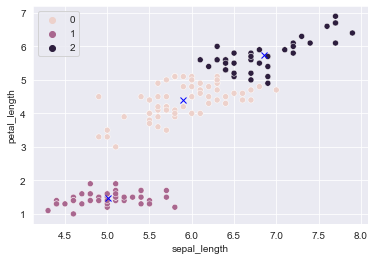

In [14]:
sns.scatterplot(data= x, x= "sepal_length", y= "petal_length", hue= preds)
centers_x, centers_y= model.cluster_centers_[:,0], model.cluster_centers_[:,2]
plt.plot(centers_x, centers_y, "xb");

As you can see, K-means algorithm was able to classify (for the most part) different specifies of flowers into separate clusters. Note that we did not provide the "species" column as an input to `KMeans`.

We can check the "goodness" of the fit by looking at `model.inertia_`, which contains the sum of squared distances of samples to their closest cluster center. Lower the inertia, better the fit.

In [15]:
model.inertia_

78.85144142614601

Let's try creating 6 clusters.

In [16]:
model= KMeans(n_clusters= 6, random_state= 42).fit(x)

In [17]:
preds= model.predict(x)
preds

array([5, 1, 1, 1, 5, 5, 1, 5, 1, 1, 5, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5,
       1, 5, 1, 1, 5, 5, 5, 1, 1, 5, 5, 5, 1, 1, 5, 5, 1, 5, 5, 1, 1, 5,
       5, 1, 5, 1, 5, 1, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3,
       3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 4, 3, 0, 4, 4, 0, 2, 0, 4, 0,
       4, 4, 4, 3, 4, 4, 4, 0, 0, 3, 4, 3, 0, 3, 4, 0, 3, 3, 4, 0, 0, 0,
       4, 3, 3, 0, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 3])

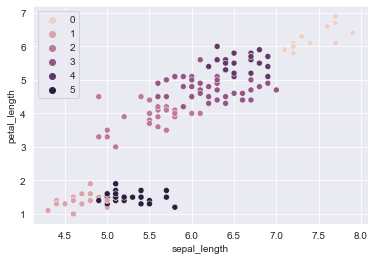

In [18]:
sns.scatterplot(data= x, x= "sepal_length", y= "petal_length", hue= preds);

In most real-world scenarios, there's no predetermined number of clusters. In such a case, you can create a plot of "No. of clusters" vs "Inertia" to pick the right number of clusters.

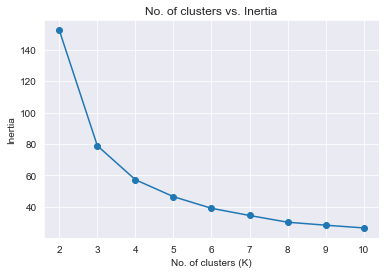

In [19]:
options = range(2,11)
inertias= []
for n_clusters in options:
    model= KMeans(n_clusters, random_state= 42).fit(x)
    inertias.append(model.inertia_)
    
plt.title("No. of clusters vs. Inertia")
plt.plot(options, inertias, "-o")
plt.xlabel('No. of clusters (K)')
plt.ylabel('Inertia');

The chart is creates an "elbow" plot, and you can pick the number of clusters beyond which the reduction in inertia decreases sharply.

**Mini Batch K Means**: The K-means algorithm can be quite slow for really large dataset. Mini-batch K-means is an iterative alternative to K-means that works well for large datasets. Learn more about it here: https://scikit-learn.org/stable/modules/clustering.html#mini-batch-kmeans

### DBSCAN

Density-based spatial clustering of applications with noise (DBSCAN) uses the density of points in a region to form clusters. It has two main parameters: "epsilon" and "min samples" using which it classifies each point as a core point, reachable point or noise point (outlier).

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/DBSCAN-Illustration.svg/800px-DBSCAN-Illustration.svg.png" width="400">

Here's a video explaining how the DBSCAN algorithm works: https://www.youtube.com/watch?v=C3r7tGRe2eI

In [20]:
from sklearn.cluster import DBSCAN

In [21]:
model= DBSCAN(eps= 1.1, min_samples= 4)

In [22]:
model = DBSCAN(eps= 1.1, min_samples= 4)

In [23]:
model.fit(x)

DBSCAN(eps=1.1, min_samples=4)

In DBSCAN, there's no prediction step. It directly assigns labels to all the inputs.

In [24]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

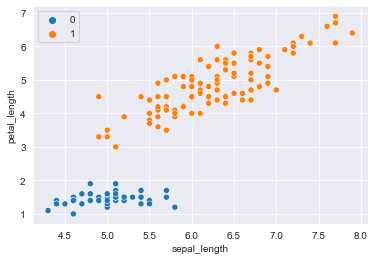

In [26]:
sns.scatterplot(data= x, x= "sepal_length", y= "petal_length", hue= model.labels_);

In [27]:
model= DBSCAN(eps= 2.2, min_samples= 8)

In [28]:
model.fit(x)

DBSCAN(eps=2.2, min_samples=8)

In [29]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

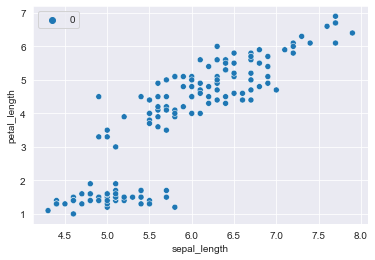

In [30]:
sns.scatterplot(data= x, x= "sepal_length", y= "petal_length", hue= model.labels_);

In [31]:
model= DBSCAN(eps= 0.5, min_samples= 2)

In [32]:
model.fit(x)

DBSCAN(min_samples=2)

In [33]:
model.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  2,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,
        3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  3,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  2,  1,  1,  1,
        1,  1,  1,  4, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  5,  4,
        1,  1,  1,  4,  1,  1,  1,  1,  1,  1,  1,  1,  5,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

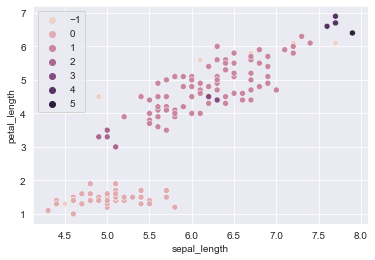

In [34]:
sns.scatterplot(data= x, x= "sepal_length", y= "petal_length", hue= model.labels_);

Here's how the results of DBSCAN and K Means differ:

<img src="https://miro.medium.com/max/1339/0*xu3GYMsWu9QiKNOo.png" width="640">

### Hierarchical Clustering

Hierarchical clustering, as the name suggests, creates a hierarchy or a tree of clusters.

<img src="https://dashee87.github.io/images/hierarch.gif" width="640">

While there are several approaches to hierarchical clustering, the most common approach works as follows:

1. Mark each point in the dataset as a cluster.
2. Pick the two closest cluster centers without a parent and combine them into a new cluster. 
3. The new cluster is the parent cluster of the two clusters, and its center is the mean of all the points in the cluster.
3. Repeat steps 2 and 3 till there's just one cluster left.

Watch this video for a visual explanation of hierarchical clustering: https://www.youtube.com/watch?v=7xHsRkOdVwo

## Dimensionality Reduction and Manifold Learning

In machine learning problems, we often encounter datasets with a very large number of dimensions (features or columns). Dimensionality reduction techniques are used to reduce the number of dimensions or features within the data to a manageable or convenient number. 


Applications of dimensionality reduction:

* Reducing size of data without loss of information
* Training machine learning models efficiently
* Visualizing high-dimensional data in 2/3 dimensions

### Principal Component Analysis (PCA)

Principal component is a dimensionality reduction technique that uses linear projections of data to reduce their dimensions, while attempting to maximize the variance of data in the projection. Watch this video to learn how PCA works: https://www.youtube.com/watch?v=FgakZw6K1QQ

Here's an example of PCA to reduce 2D data to 1D:

<img src="https://i.imgur.com/ZJ7utlo.png" width="480">

Here's an example of PCA to reduce 3D data to 2D:

<img src="https://lihan.me/assets/images/pca-illustration.png" width="640">


Let's apply Principal Component Analysis to the Iris dataset.

In [35]:
iris= sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [36]:
numeric_cols

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [38]:
from sklearn.decomposition import PCA

In [39]:
pca= PCA(n_components= 2)

In [40]:
pca.fit(iris[numeric_cols])

PCA(n_components=2)

In [41]:
pca

PCA(n_components=2)

In [42]:
transformed= pca.transform(iris[numeric_cols])

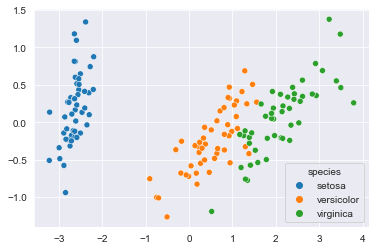

In [43]:
sns.scatterplot(x= transformed[:,0], y= transformed[:,1], hue= iris["species"]);

As you can see, the PCA algorithm has done a very good job of separating different species of flowers using just 2 measures.

### t-Distributed Stochastic Neighbor Embedding (t-SNE)

Manifold learning is an approach to non-linear dimensionality reduction. Algorithms for this task are based on the idea that the dimensionality of many data sets is only artificially high. Scikit-learn provides many algorithms for manifold learning: https://scikit-learn.org/stable/modules/manifold.html . A commonly-used manifold learning technique is t-Distributed Stochastic Neighbor Embedding or t-SNE, used to visualize high dimensional data in one, two or three dimensions. 

Here's a visual representation of t-SNE applied to visualize 2 dimensional data in 1 dimension:

<img src="https://i.imgur.com/rVMAaix.png" width="360">


Here's a visual representation of t-SNE applied to the MNIST dataset, which contains 28px x 28px images of handrwritten digits 0 to 9, a reduction from 784 dimensions to 2 dimensions ([source](https://colah.github.io/posts/2014-10-Visualizing-MNIST/)):

<img src="https://indico.io/wp-content/uploads/2015/08/mnist-1024x607-1.jpg" width="640">

Here's a video explaning how t-SNE works: https://www.youtube.com/watch?v=NEaUSP4YerM

In [48]:
from sklearn.manifold import TSNE

In [49]:
tsne= TSNE(n_components= 2)

In [50]:
transformed= tsne.fit_transform(iris[numeric_cols])

C:\Users\user\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


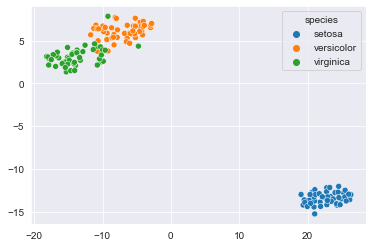

In [52]:
sns.scatterplot(x= transformed[:,0], y= transformed[:,1], hue= iris["species"]);